<a href="https://colab.research.google.com/github/cdiegor/Metaheuristicas/blob/main/2DKP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problema da mochila bidimensional

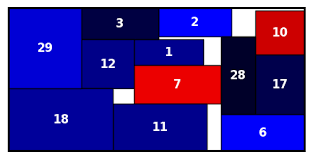

## Introdução

No problema da mochila bidimensional temos um conjunto $N = {1, ..., n}$ de objetos com valor $p_i$ e com dimensões $w_i \times l_i$, $i = 1, ..., n$ que devem ser colocados dentro de uma caixa com dimensões $W \times L$ sem sobreposição.


In [ ]:
class kp2d:
  __init__(self):
    self.n: int = 0
    self.p: list[int] = []
    self.w: list[int] = []
    self.l: list[int] = []
    self.W: int = 0
    self.L: int = 0

## Representação

Podemos construir uma solução com a localização dos objetos se soubermos as posições relativas entre eles.

Para modelar as posições relativas vamos utilizar uma estrutura chamada pares de sequência. Nos pares de sequência temos duas sequências: uma que determina qual objeto antecede o outro e uma segunda que determina se essa precedência é horizontal ou vertical.

In [ ]:
class parseq:
  __init__(self, n:int):
    self.sa:tuple = (i for i in range(n))
    self.sb:tuple = (i for i in range(n))


In [ ]:
def disposicao(I:kp2d, P:parseq):
  x: list[int] = [0 for i in range(I.n)]
  y: list[int] = [0 for i in range(I.n)]
  for k in range(I.n):
    j = P.sa[k]
    for l in range(k):
      i = P.sa[l]
      if P.sb.index(i) < P.sb.index(j):
        #relação vertical
        y[j] = max(y[j], y[i]+I.l[i])
      else:
        #relação horizontal
        x[j] = max(x[j], x[i]+I.w[i])
  return x, y

def solucao(I:kp2d, x:list[int], y:list[int]):
  v: int = 0
  z: list[int] = [0 for i in range(I.n)]
  for k in range(I.n):
    if x[k]+I.w[k] < I.W and y[k]+I.l[k] < I.L:
      z[k] = 1
      v = v+I.p[k]
  return z, v


## BRKGA

In [ ]:
def gerar_sequencia(R:list[float]):
  A = [ (R[i], i) for i in range(len(R)) ]
  A.sort(key= lambda x : x[0])
  S = [ A[i][1] for i in range(len(R))]
  return S


def decodificar(I:kp2d, R:list[float])
  P: parseq(len(R)//2)
  P.sa = gerar_sequencia(R[:len(R)//2])
  P.sb = gerar_sequencia(R[len(R)//2:])
  x, y = disposicao(I, P)
  z, v = solucao(I, x, y)
  return v


## Exercícios